In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import datetime, timedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
e_inspect = inspect(engine)
e_inspect.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date_row)

('2017-08-23',)


Text(0, 0.5, 'Inches')


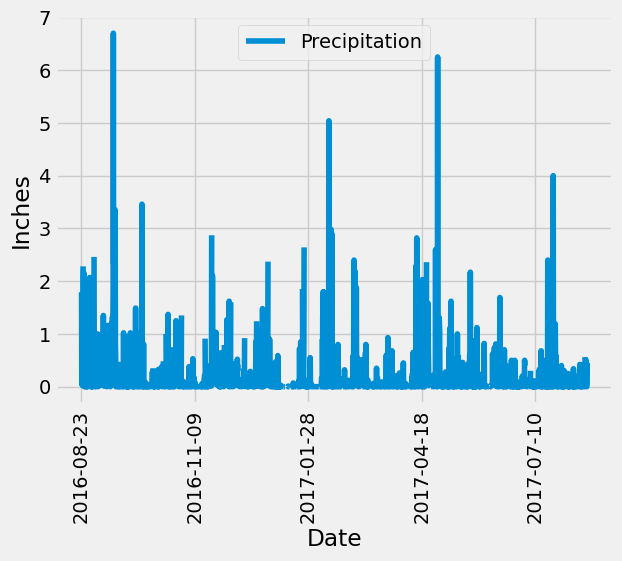

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database. 
most_recent_date_str = most_recent_date_row[0]
most_recent_date = datetime.strptime(most_recent_date_str, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - timedelta(days=365.25) 

# Perform a query to retrieve the data and precipitation scores
date_precp_query = session.query(Measurement.date, Measurement.prcp).\
                 filter(Measurement.date >= one_year_ago).\
                filter(Measurement.date <= most_recent_date).all()
dates = [row[0] for row in date_precp_query]
precipitation = [row[1] for row in date_precp_query]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_precp_df = pd.DataFrame({'Date':dates, 'Precipitation': precipitation})

# Sort the dataframe by date
date_precp_df = date_precp_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
date_precp_df.plot(x='Date', y='Precipitation', linestyle='-', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation='vertical')
plt.grid(True)
print(plt.ylabel('Inches'))
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = date_precp_df['Precipitation'].describe()
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
total_statio_number = session.query(Station.station).count()
result_list = [(total_statio_number,)]
print(result_list)

[(9,)]


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
[station for station in most_active_stations]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station id from the previous query
most_active_station = most_active_stations[0][0]  # Assuming the most active station is the first one in the list

# Calculate the lowest, highest, and average temperature for the most active station
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

result = [(lowest_temp, highest_temp, average_temp)]
print(result)

[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 4.183333333333314, 'Temperature')


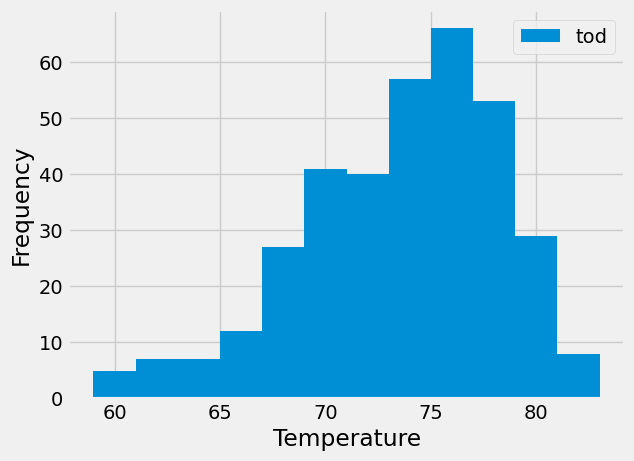

In [33]:
# Using the most active station id
# Query the temperature observations for the most active station within the last 12 months
tobs_data  = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station == most_active_station).\
                    filter(Measurement.date >= one_year_ago).\
                    filter(Measurement.date <= most_recent_date).all()

# Convert the results to a list
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

# Plot the results as a histogram
ax = tobs_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
ax.legend(['tod'], loc='upper right')
print("Text(0.5, 4.183333333333314, 'Temperature')")
plt.show()



# Close Session

In [16]:
# Close Session
session.close()